In [70]:
import numpy as np
import pandas as pd

output = {}
for i in range(1000):
    n = np.random.choice(6)
    if not n in output:
        output[n] = 0
    output[n] += 1
output

# Methods For Battles (rolling dice until all troops are depleted)

In [2]:
def roll_dice():
    return np.random.choice(6) + 1

In [3]:
def roll_all_dice(count):
    return sorted([roll_dice() for i in range(count)], reverse=True)
roll_all_dice(2)

[6, 2]

In [4]:
def attack_once(attacker_dice_count, defender_dice_count):
    attacker_dice = roll_all_dice(attacker_dice_count)
    defender_dice = roll_all_dice(defender_dice_count)
    
    attacker_loss = 0
    defender_loss = 0
    for i in range(min(len(attacker_dice), len(defender_dice))):
        attacker_roll = attacker_dice[i]
        defender_roll = defender_dice[i]
        if attacker_roll > defender_roll:
            defender_loss += 1
        else:
            attacker_loss += 1
    
    return (attacker_loss, defender_loss), (attacker_dice, defender_dice)
    

# Returns (loss, dice)
attack_once(3, 2)
    

((2, 0), ([5, 5, 3], [6, 6]))

In [5]:
def get_max_dice_count(soldier_count, is_attacker = False):
    max_dice = 3 if is_attacker else 2
    
    return min(max_dice, max(soldier_count - 1, 1))
get_max_dice_count(3, False)

2

In [6]:
def attack_with_all_dice(attacker_soldier_count, defender_soldier_count):
    attacker_dice_count = get_max_dice_count(attacker_soldier_count, True)
    defender_dice_count = get_max_dice_count(defender_soldier_count, False)
    if attacker_dice_count == 0:
        return None
    if defender_dice_count == 0:
        return None
    
    return attack_once(attacker_dice_count, defender_dice_count)
#     print(attacker_dice_count, defender_dice_count)
attack_with_all_dice(3, 1)

((1, 0), ([4, 1], [4]))

In [64]:
# Continue to attack as long as possible
def blitz(attacker_soldier_count, defender_soldier_count):
    while(attacker_soldier_count > 1 and defender_soldier_count > 0):
        loss, dice = attack_with_all_dice(attacker_soldier_count, defender_soldier_count)

        attacker_loss, defender_loss = loss
        attacker_soldier_count -= attacker_loss
        defender_soldier_count -= defender_loss

    return attacker_soldier_count, defender_soldier_count
blitz(10, 10)

(1, 4)

# Analyze Wins Versus Defeats

In [58]:
def perform_analysis(attacker_soldier_count, defender_soldier_count, iterations=100):
    attacker_win_count = 0
    total_attack_count = 0
    
    for i in range(iterations):
        attacker_win, defender_win = blitz(attacker_soldier_count, defender_soldier_count)
        attacker_win_count += 1 if attacker_win > 1 else 0
        total_attack_count += 1
    
    percent = 0
    if total_attack_count == 0:
        percent == 100
    else:
        ratio = (attacker_win_count / total_attack_count)
        percent = np.round(ratio * 100, 2)
    print('Attacker won {}% of the time'.format(percent))

perform_analysis(3, 2)

Attacker won 52.0% of the time


In [9]:
def perform_all_analysis():
    ITERATIONS = 10000
    soldier_counts = [
        (2, 1),
        (3, 1),
        (4, 1),
        (5, 1),
        (3, 2),
        (2, 2),
        (4, 3),
        (6, 2),
        (10, 10),
    ]
    
    for soldier_count in soldier_counts:
        attacker_soldiers, defender_soldiers = soldier_count
        print('For ({}, {})'.format(attacker_soldiers, defender_soldiers), end=': ')
        perform_analysis(attacker_soldiers, defender_soldiers, iterations=ITERATIONS)
perform_all_analysis()

For (2, 1): Attacker won 42.28% of the time
For (3, 1): Attacker won 76.13% of the time
For (4, 1): Attacker won 91.91% of the time
For (5, 1): Attacker won 97.05% of the time
For (3, 2): Attacker won 50.02% of the time
For (2, 2): Attacker won 17.18% of the time
For (4, 3): Attacker won 52.76% of the time
For (6, 2): Attacker won 96.11% of the time
For (10, 10): Attacker won 51.34% of the time


In [67]:
ITERATIONS=10000
attacker_soldiers=9
defender_soldiers=6
perform_analysis(attacker_soldiers, defender_soldiers, iterations=ITERATIONS)

Attacker won 77.53% of the time


### Huge number of iterations

In [11]:
perform_analysis(3, 1, 10000000)

Attacker won 75.44% of the time


# How many troops remain after attack

In [74]:
def count_remaining_troops(attacker_soldier_count, defender_soldier_count, iterations=100):
    remaining_attacking_soldiers = []
    remaining_defending_soldiers = []
    for i in range(iterations):
        attacker_win, defender_win = blitz(attacker_soldier_count, defender_soldier_count)
        if attacker_win > 1:
            remaining_attacking_soldiers.append(attacker_win -1)
        if defender_win > 0:
            remaining_defending_soldiers.append(defender_soldier_count)
    
    return remaining_attacking_soldiers, remaining_defending_soldiers
#     return pd.DataFrame({'attack': remaining_attacking_soldiers, 'defend':remaining_defending_soldiers})

    
    

<AxesSubplot:ylabel='Frequency'>

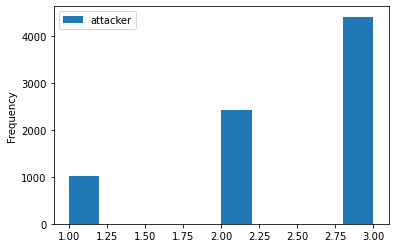

In [80]:
pd.DataFrame({'attacker': count_remaining_troops(4, 2, 10000)[0]}).plot.hist()

# Chance of Attacker Defeating Defender

Attacking dice has a 15/36 (roughly 41.67%) chance of defeating a defending dice.

In [15]:
perform_analysis(4, 1, 100000)

Attacker won 91.78% of the time


In [16]:
perform_analysis(3, 1, 100000)

Attacker won 75.38% of the time


## Using Statistical Probability

In [17]:
def calculate_winning_dividend(numbers_count=4):
    r

In [ ]:
1 - ((1/2) ** 3) - ((3/6) * ((1/2) ** 3))

In [ ]:
0.8125 * 64

In [ ]:
((3/6) * ((1/2) ** 3)) * 64

In [ ]:
((1/2) ** 3) * 8

### Probability of attacker winning with 3v1 dice

In [19]:
ATTACKER_DICE_COUNT=3

attacker_dice_count = ATTACKER_DICE_COUNT
probability_defender_wins = (1/2) ** 3
probability_of_tie = (1/2) ** 3

probability_attacker_wins = 1 - probability_defender_wins - probability_of_tie
probability_attacker_wins

0.75